<a href="https://colab.research.google.com/github/siddhp4/Assignment-1-Q23-Basic-Statistics-Level-1-/blob/main/Clustering_Assgn_A_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')


In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data=data.rename({'ID#':'ID', 'Award?':'Award'} , axis=1)
data.head()
# Renaming columns

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1
 # Checking for all the values in dataset of type integer, if not replacing them with nan

In [8]:
check_int(data[data.columns])


In [9]:
data.isna().sum()


ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


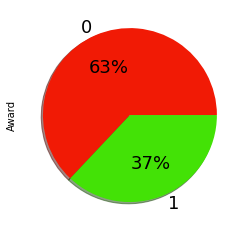

In [11]:
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()
# Checking previously awarded miles ratio

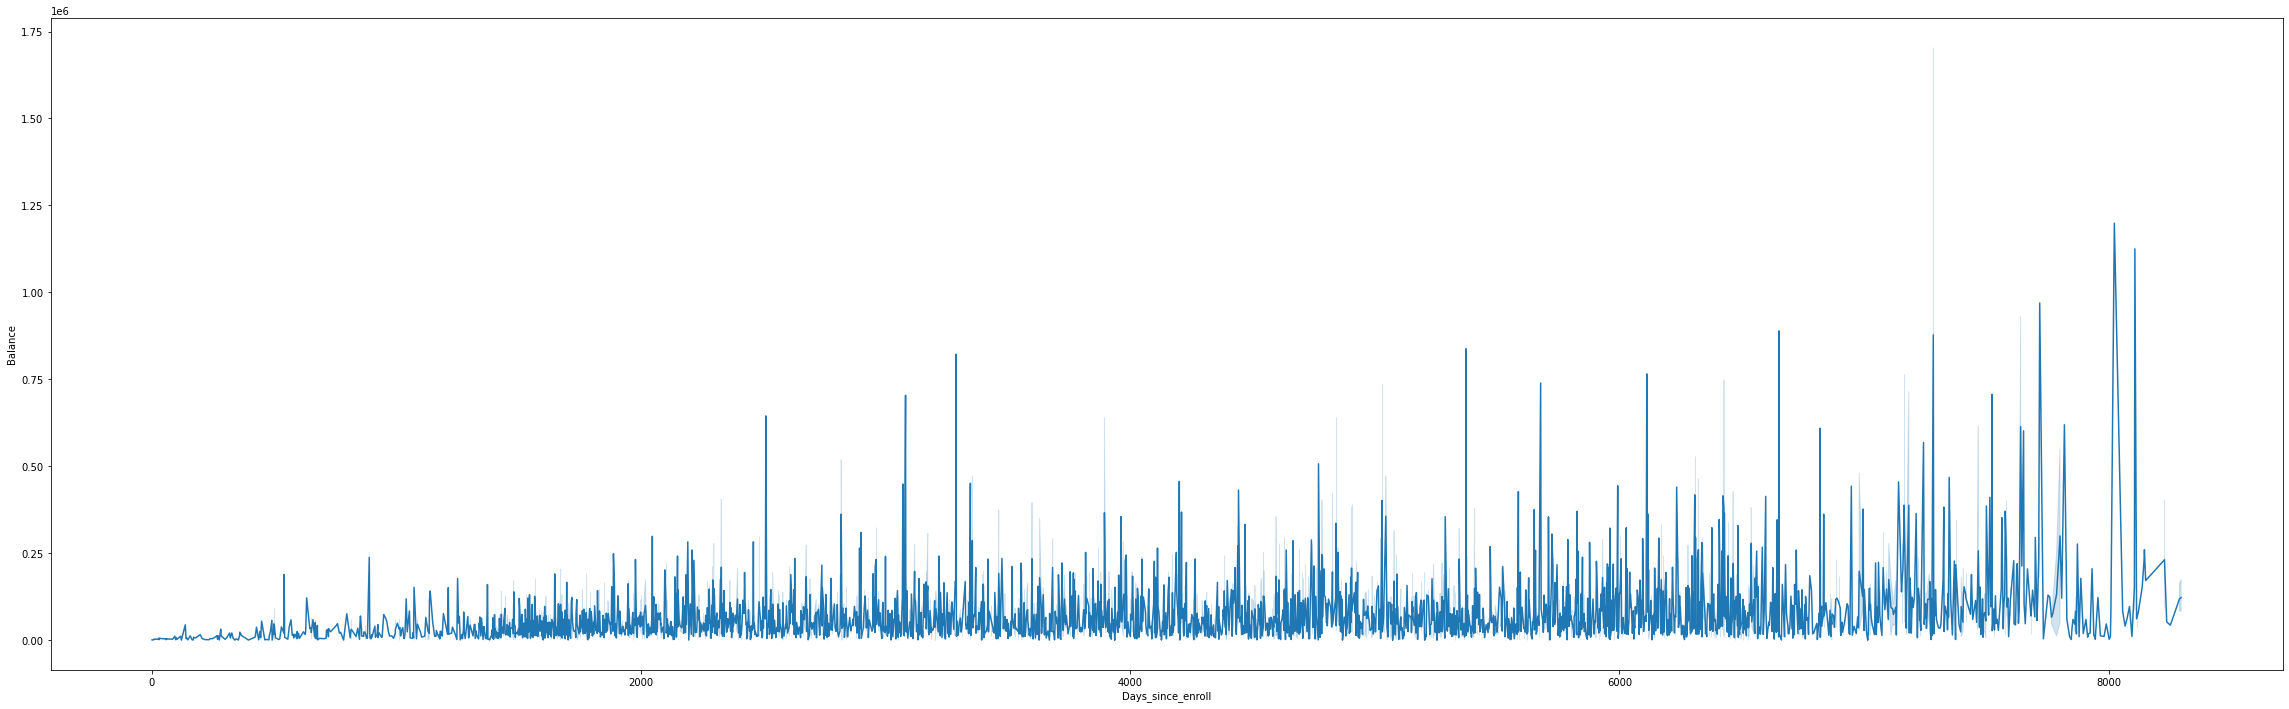

In [12]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)


 **AGLOMERATIVE CLUSTERING**

In [14]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [16]:
#check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [17]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

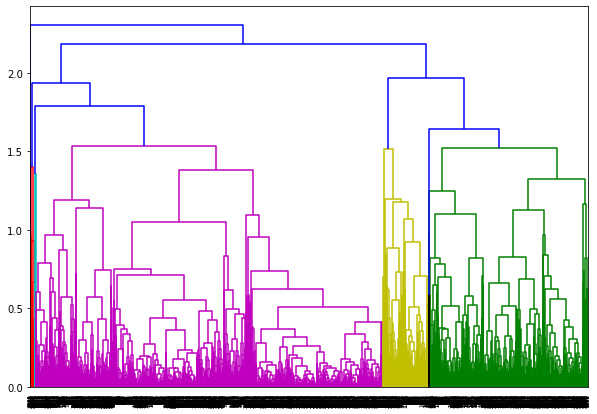

In [18]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

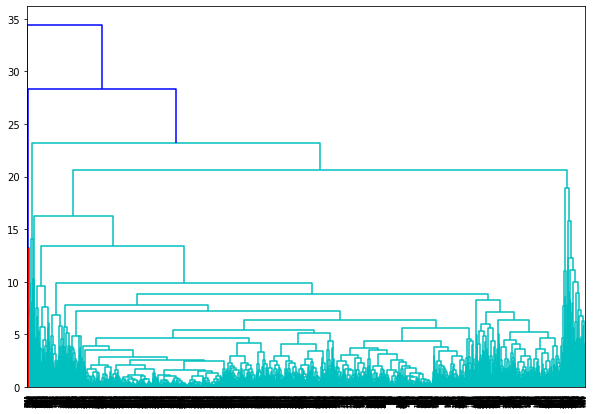

In [19]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [21]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [22]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [23]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

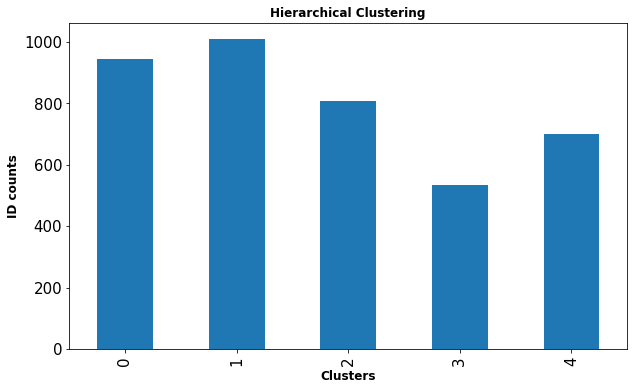

In [24]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [25]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0


In [26]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [27]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [28]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [29]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

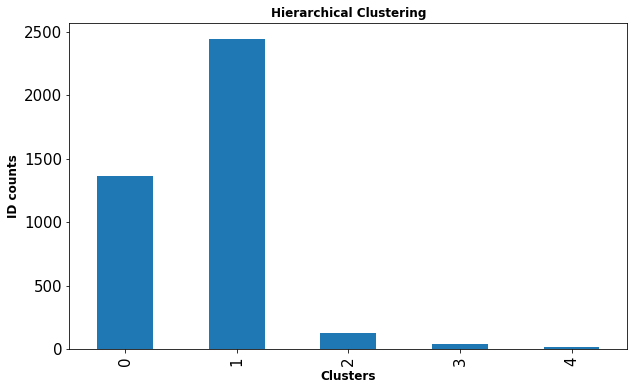

In [30]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [31]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1,0.627907
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0,1.044510
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0,0.507426
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1,0.261682
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0,1.011445


In [32]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3098805307874414

**K-MEANS CLUSTERING**

In [33]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [34]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [35]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         1.         0.25      ]
 [0.00176908 0.         0.         ... 0.         1.         0.25      ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -1.17607423e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  4.41786398e-01]
 [-7.00507951e-01 -1.862

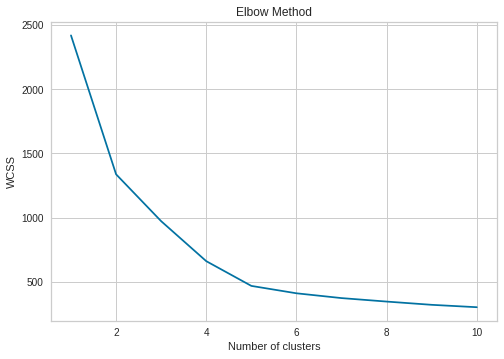

In [36]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


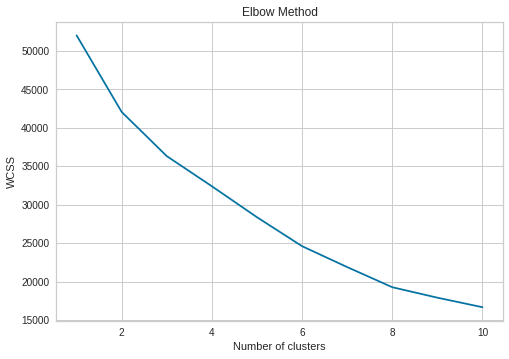

In [37]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**From above two Scree plots, optimum number of clusters can be selected equal to 5**

In [38]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5578853150250931
Silhouette Score for data normalized by StandardScaler:  0.3294874511326423


In [40]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [41]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    1194
0     948
3     699
4     625
2     533
Name: clusterid_Kmeans, dtype: int64

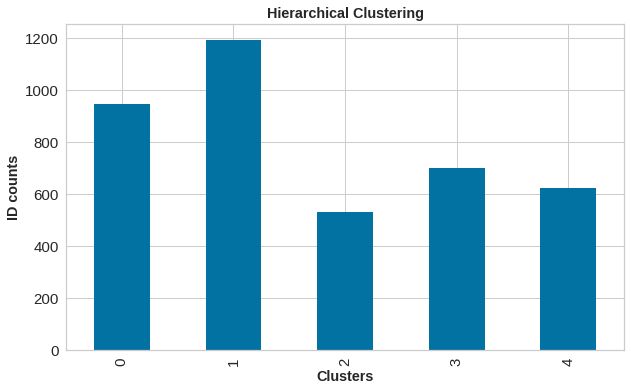

In [42]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [43]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,80071.828059,276.433544,1.694093,1.024262,1.002110,12186.982068,12.262658,827.800633,2.483122,4367.631857,1,0.009494,0.635021
1,1,46926.743719,77.376884,1.144054,1.028476,1.006700,3747.433836,6.634003,159.219430,0.485762,4834.253769,0,1.153266,1.032663
2,2,127256.052533,175.744841,4.382739,1.000000,1.046904,58641.013133,22.043152,910.326454,2.806754,5082.930582,1,2.994371,0.247655
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0,4.000000,1.011445
4,4,117737.968000,95.448000,3.566400,1.001600,1.022400,31191.422400,17.337600,226.950400,0.640000,4402.667200,0,2.000000,0.372800


**DBSCAN**

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.25       0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.25       0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.25       0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.        ]
 [0.03220189 0.         0.         ... 1.         0.25       0.75      ]
 [0.00176908 0.         0.         ... 1.         0.25       0.75      ]]


**We will try for different values of eps and mn_samples**

In [47]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [48]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [49]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

 0    2518
 1    1479
-1       2
Name: clusterid_DBSCAN, dtype: int64

In [50]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4351796533177913

KeyError: ignored

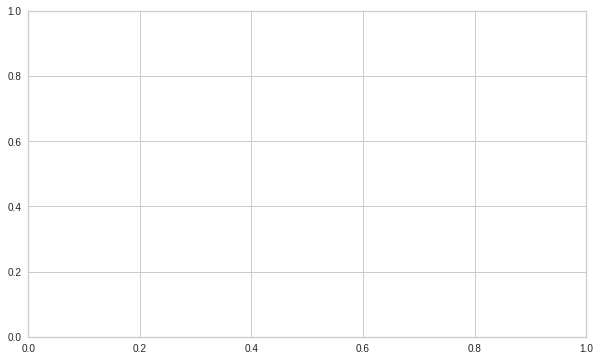

In [51]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [52]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2514
 2     946
 1     531
-1       8
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.46555408376042645


In [54]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    1191
 3     942
 4     699
 2     618
 1     523
-1      26
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6261231990669098


In [55]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

 0    1166
 3     925
 6     699
 2     615
 1     474
-1      56
 4      48
 5      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5870644557307444


In [56]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    1166
 3     926
 5     699
 2     618
 1     523
-1      30
 4      25
 6      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6075903950018834


**When we have value of epsilon = 0.55, we are getting 6 clusters with data less than 50% in one cluster and also, silhouette score is more as compared to other dbscan models.**
**-1 shows the noisy data points**

In [57]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_

In [58]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,2,1


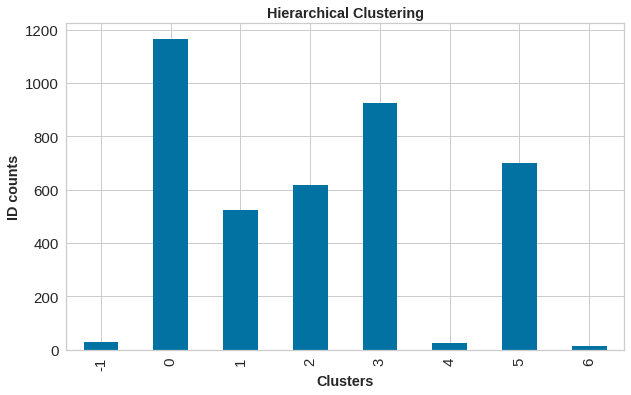

In [59]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [60]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,183411.700000,429.833333,2.833333,1.333333,2.633333,72041.633333,30.533333,3054.166667,8.600000,4367.433333,0.666667,1.833333,3.200000,1.7
1,0,46899.698971,79.234991,1.147513,1.000000,1.000000,3461.704974,6.469983,159.826758,0.484563,4864.476844,0.000000,1.155232,0.982847,1.0
2,1,128144.883365,159.577438,4.384321,1.000000,1.000000,57731.363289,21.841300,878.879541,2.755258,5092.133843,1.000000,3.000000,0.187380,2.0
3,2,116706.328479,96.529126,3.563107,1.000000,1.000000,30816.666667,17.226537,224.990291,0.634304,4406.014563,0.000000,2.000000,0.333333,4.0
4,3,77576.992441,280.104752,1.707343,1.000000,1.000000,11772.331533,11.903888,768.916847,2.303456,4364.233261,1.000000,0.000000,0.586393,0.0
5,4,43494.400000,0.000000,1.000000,2.360000,1.000000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.000000,1.000000,3.000000,1.0
6,5,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.000000,4.000000,1.011445,3.0
7,6,91415.916667,0.000000,1.083333,2.166667,1.000000,12827.666667,19.500000,788.583333,2.166667,4540.583333,1.000000,0.000000,3.000000,0.0
